<a href="https://colab.research.google.com/github/guilhermelaviola/BusinessIntelligenceAndBigDataArchitectureWithAppliedDataScience/blob/main/Class07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statistical Modeling & Data Mining Applications**
Statistical modeling and data mining encompass a range of techniques used to understand relationships between variables, make predictions, and support decision-making. Tools such as Ishikawa diagrams, regression analysis, and decision trees help identify causes, quantify relationships, and model decisions, while classification methods (binary, multiclass, and multi-label) organize data into meaningful categories. Time series analysis, using models like ARIMA, SARIMA, and state-space models, focuses on identifying trends, seasonality, and forecasting future values. Practical applications include predicting customer behavior, diagnosing diseases, forecasting demand, and assessing risk. Overall, selecting the appropriate technique depends on the data type, analytical goals, and problem context, enabling valuable insights across diverse fields.

In [1]:
# Importing all the necessary libraries and resources:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz # Decision Tree and View package
from sklearn.model_selection import train_test_split
from sklearn import metrics
from six import StringIO
from IPython.display import Image
import pydotplus

## **Example: Decision Tree**
The following example helps visualize how different elements influence a specific outcome, allowing doctors to take corrective or preventive measures.

In [2]:
# Downloading the dataset. Link https://drive.google.com/file/d/1H1eC5tyk5e-BL2zjwYwY7bSz2BTFIe10/view?usp=sharing
!gdown 1H1eC5tyk5e-BL2zjwYwY7bSz2BTFIe10

Downloading...
From: https://drive.google.com/uc?id=1H1eC5tyk5e-BL2zjwYwY7bSz2BTFIe10
To: /content/diabetes.csv
100% 23.8k/23.8k [00:00<00:00, 5.81MB/s]


In [3]:
# Defining the column names:
col_names = ['Pregnant', 'Glucose', 'BP', 'Skin', 'Insulin', 'BMI', 'Pedigree', 'Age', 'Label']

# Loading and displaying the dataset:
pima = pd.read_csv('diabetes.csv', header=None, names=col_names)
pima.head()

,Pregnant,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Splitting dataset into features and target variable:
feature_cols = ['Pregnant', 'Insulin', 'BMI', 'Age','Glucose','BP','Pedigree']
X = pima[feature_cols] # Features
y = pima.Label # Target

In [5]:
# Splitting the dataset into training set and test set. It is essential to understand the data separation process.
# Typically, we divide the dataset into 70% for training and 30% for testing. It's a common practice to validate the effectiveness of the model:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
# Creating Decision Tree Classifier Object.
# We use the decision tree to analyze how variables such as number of pregnancies, glucose level, blood pressure,
# skin thickness, insulin level, body mass index, diabetes pedigree function and age influence the diagnosis of diabetes:
clf = DecisionTreeClassifier()

# Training:
clf = clf.fit(X_train,y_train)

# Testing:
y_pred = clf.predict(X_test)

In [7]:
# Accuracy is the proportion of correct predictions (both positive and negative) out of the total predictions made:
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6623376623376623


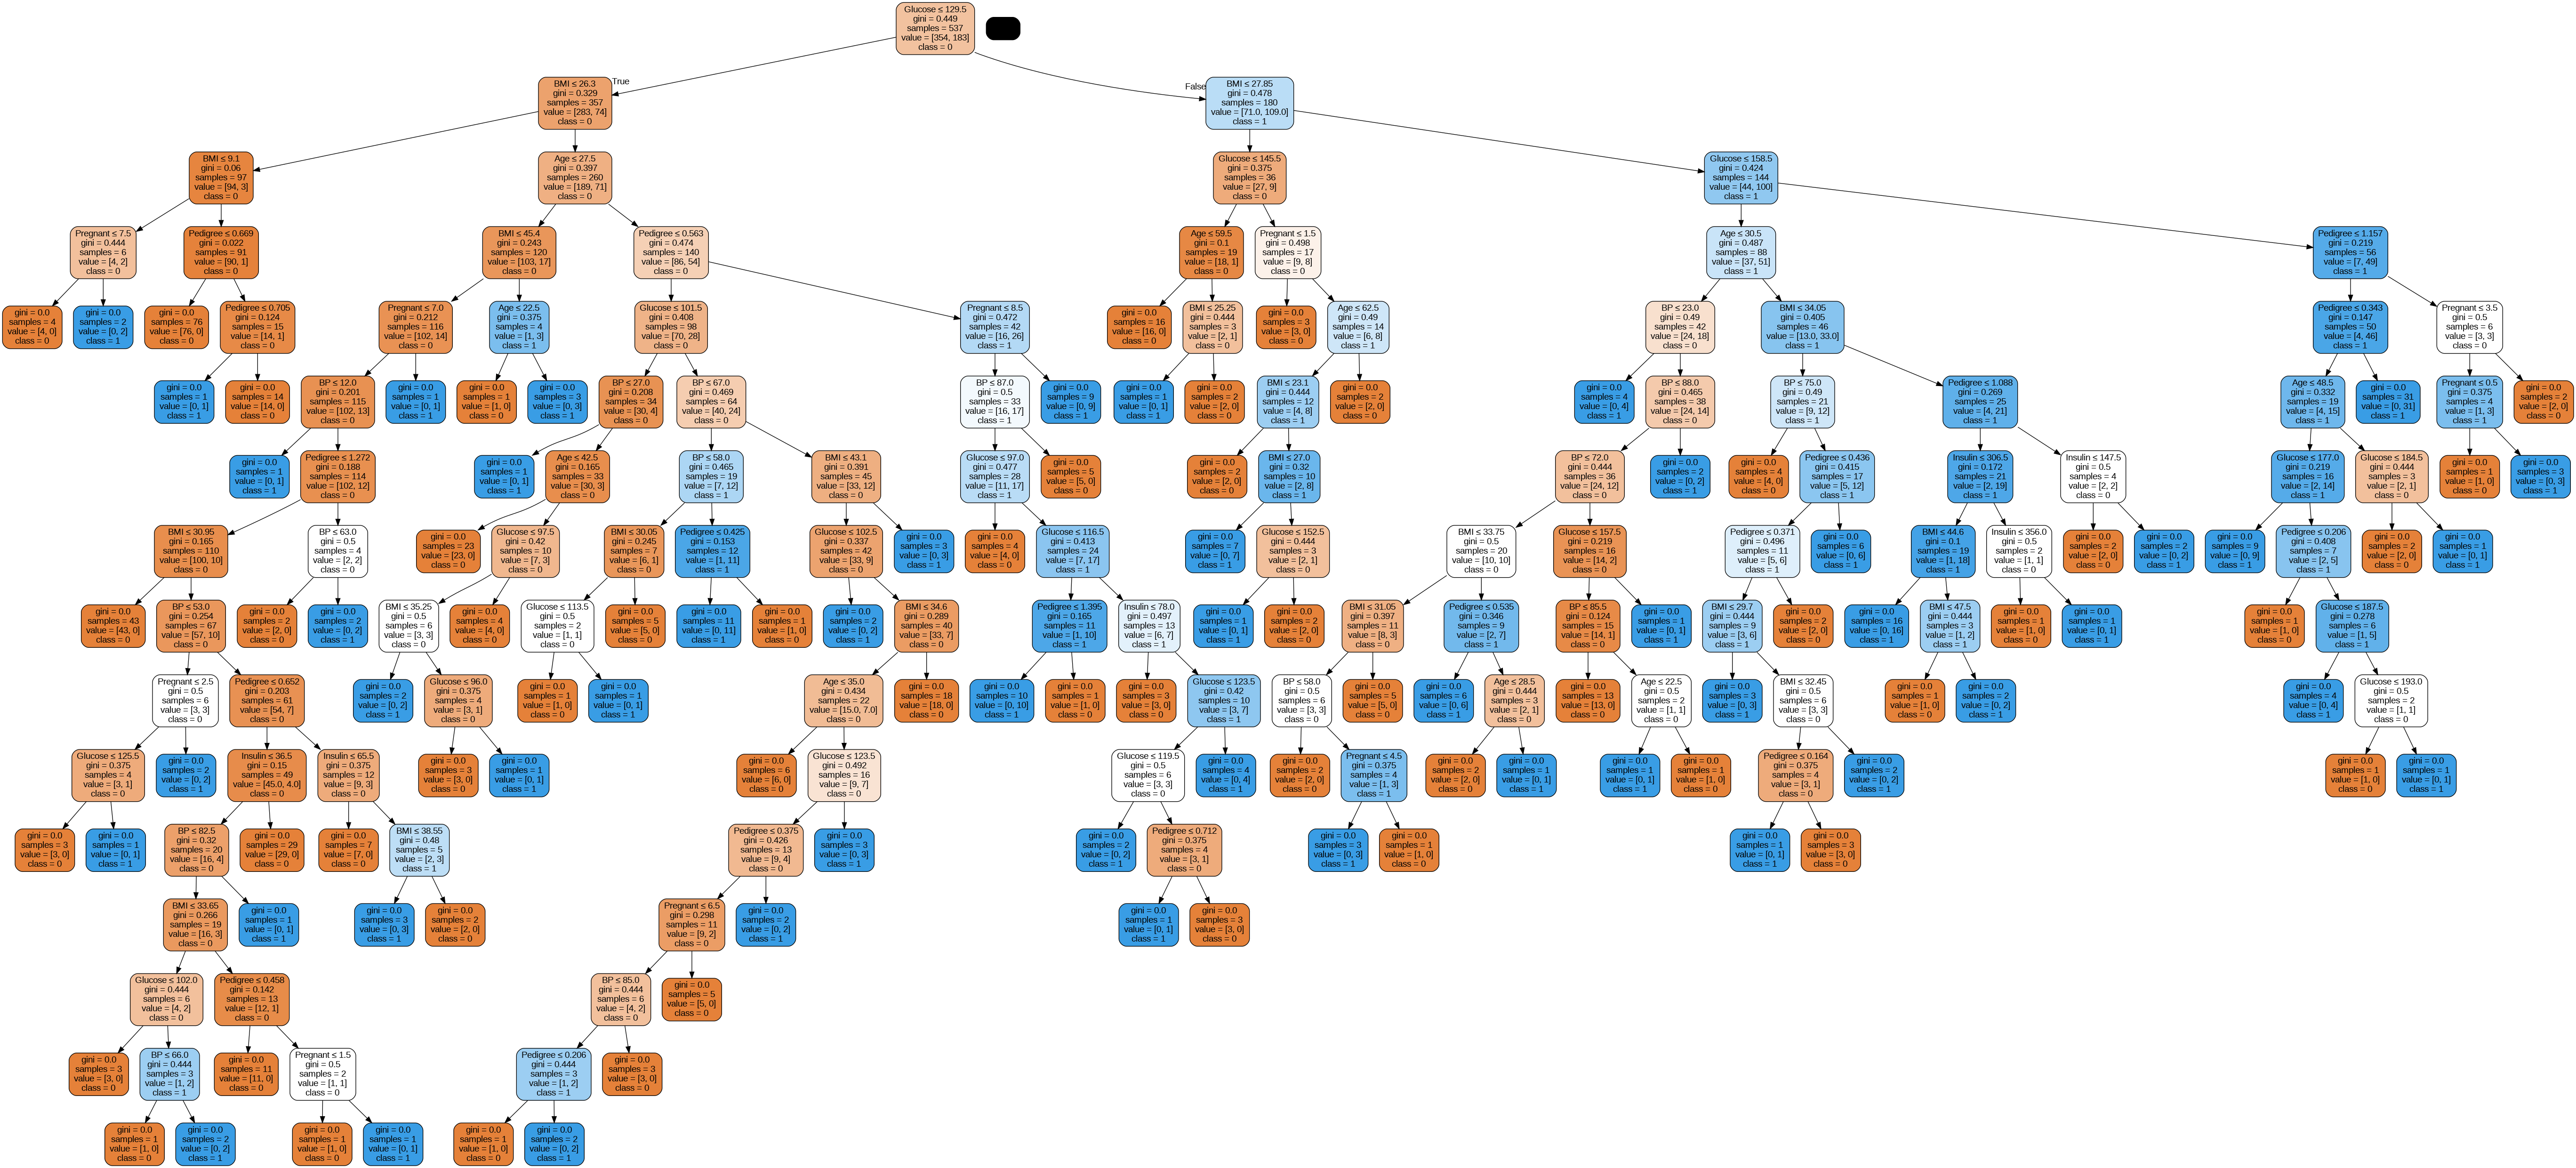

In [8]:
# Decision tree visualization is crucial to understanding the model's decision process.
# We evaluate the model's performance using metrics such as accuracy, confusion matrix, Gini index, and entropy.
# The Gini index reflects how often a random element of the dataset would be incorrectly classified, while entropy measures the disorder or impurity of the data:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_gini.png')
Image(graph.create_png())

In [9]:
# Creating a dictionary with the variables:
dic = {'score':clf.feature_importances_,'features':X_train.columns}

# Creating a dataframe with the data and displaying it:
df = pd.DataFrame(dic).sort_values('score',ascending=False)
df.head()

,score,features
4,0.314427,Glucose
2,0.211133,BMI
5,0.147020,BP
6,0.130593,Pedigree
3,0.089880,Age


In [10]:
# Defining the classifier:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Training:
clf = clf.fit(X_train, y_train)

# Testing
y_pred = clf.predict(X_test)

# Displaying the accuracy:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


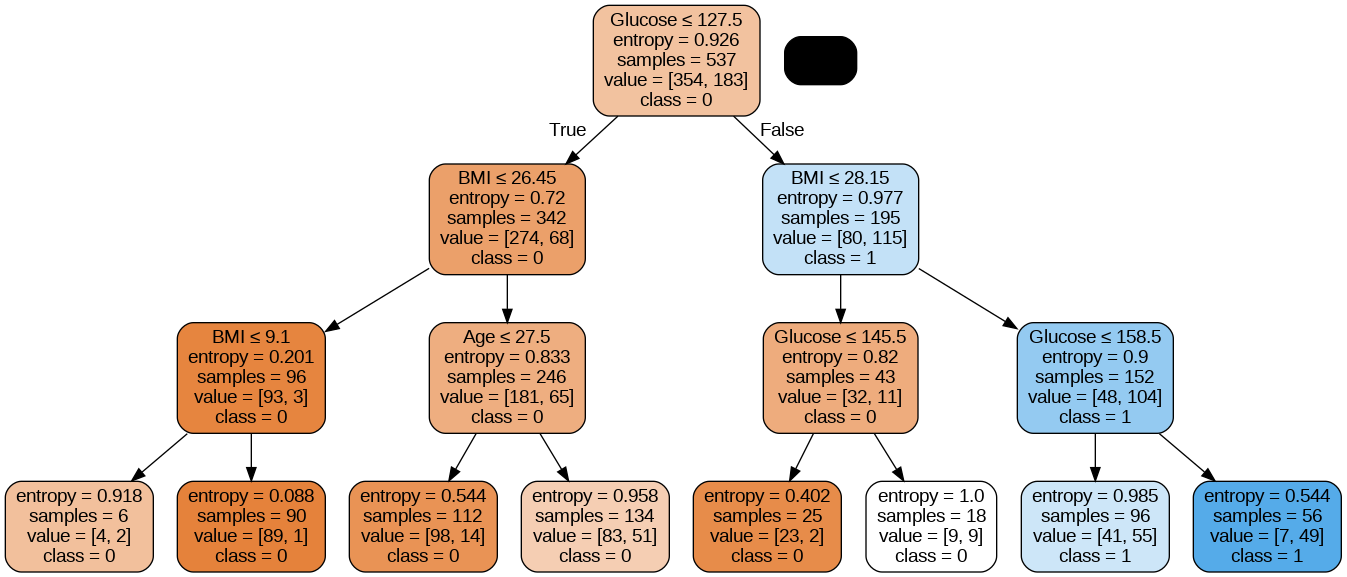

In [11]:
# Decision Tree:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_entropia.png')
Image(graph.create_png())

In [12]:
# Creating the dictionary with the variables:
dic = {'score':clf.feature_importances_,'features':X_train.columns}

# Creating the dataframe with the data and displaying it:
df = pd.DataFrame(dic).sort_values('score', ascending=False)
df.head()

,score,features
4,0.562837,Glucose
2,0.326594,BMI
3,0.110569,Age
1,0.000000,Insulin
0,0.000000,Pregnant
